In [59]:
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%run functions.py

In [60]:
num_days = 252

In [61]:
wanted_stocks = ['GOOG', 'SPG', 'GOOGL', 'MSFT', 'GD', 'ACN', 'COP', 'F', 'BAC', 'GS',
       'NVDA', 'AIG', 'MS', 'WFC', 'ORCL', 'XOM', 'TGT', 'LOW', 'EXC', 'COST',
       'AXP', 'BK', 'JPM', 'COF', 'CSCO', 'DHR', 'UNH', 'CVS', 'LLY', 'CVX',
       'MET', 'AMT', 'CRM', 'BLK', 'RTX', 'MCD', 'TMO', 'LIN', 'ADBE', 'EMR',
       'USB', 'UPS', 'TSLA', 'PFE', 'PM']

In [62]:
stocks = pd.read_csv('data/sap100_data_08112021.csv',index_col=0).loc[:,wanted_stocks]
stocks.head()

,GOOG,SPG,GOOGL,MSFT,GD,ACN,COP,F,BAC,GS,...,MCD,TMO,LIN,ADBE,EMR,USB,UPS,TSLA,PFE,PM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1728.239990,80.108383,1726.130005,216.689423,142.191360,253.328720,38.381340,8.52,29.604614,261.802551,...,206.653915,471.064941,255.930817,485.339996,76.753830,45.091583,161.141953,729.770020,35.423965,78.486618
2021-01-05,1740.920044,80.456642,1740.050049,216.898438,142.259567,254.770905,40.583153,8.65,29.831354,267.660980,...,207.892548,476.955505,259.945679,485.690002,78.082092,45.238235,158.898941,735.109985,35.789654,79.343712
2021-01-06,1735.290039,82.294655,1722.880005,211.274414,145.893768,257.556427,42.202988,8.84,31.694584,282.104553,...,207.420670,484.433533,268.479645,466.309998,80.709106,47.917137,158.426727,755.979980,35.481701,79.449646
2021-01-07,1787.250000,82.352692,1774.339966,217.286652,147.822922,259.986450,43.357246,9.06,32.394527,288.130981,...,208.384064,499.529297,267.708313,477.739990,80.748459,48.875290,156.419815,816.039978,35.664547,79.911911
2021-01-08,1807.209961,83.668327,1797.829956,218.610550,146.897308,260.934753,43.357246,9.00,32.069199,286.579926,...,212.208069,511.480133,267.391876,485.100006,80.502480,48.220222,155.819717,880.020020,35.731911,80.017830


In [63]:
returns = stocks/stocks.shift(1)-1
returns.head()

,GOOG,SPG,GOOGL,MSFT,GD,ACN,COP,F,BAC,GS,...,MCD,TMO,LIN,ADBE,EMR,USB,UPS,TSLA,PFE,PM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.007337,0.004347,0.008064,0.000965,0.000480,0.005693,0.057367,0.015258,0.007659,0.022377,...,0.005994,0.012505,0.015687,0.000721,0.017305,0.003252,-0.013919,0.007317,0.010323,0.010920
2021-01-06,-0.003234,0.022845,-0.009868,-0.025929,0.025546,0.010933,0.039914,0.021965,0.062459,0.053962,...,-0.002270,0.015679,0.032830,-0.039902,0.033644,0.059218,-0.002972,0.028390,-0.008605,0.001335
2021-01-07,0.029943,0.000705,0.029869,0.028457,0.013223,0.009435,0.027350,0.024887,0.022084,0.021362,...,0.004645,0.031162,-0.002873,0.024512,0.000488,0.019996,-0.012668,0.079447,0.005153,0.005818
2021-01-08,0.011168,0.015976,0.013239,0.006093,-0.006262,0.003648,0.000000,-0.006623,-0.010043,-0.005383,...,0.018351,0.023924,-0.001182,0.015406,-0.003046,-0.013403,-0.003836,0.078403,0.001889,0.001325


In [64]:
r = returns.mean() * num_days
V = returns.cov() * num_days
sigma = returns.std() * np.sqrt(num_days)
print(r.head(),V.head(),sigma.head())

GOOG     0.643850
SPG      0.798228
GOOGL    0.644627
MSFT     0.526512
GD       0.437839
dtype: float64            GOOG       SPG     GOOGL      MSFT        GD       ACN       COP  \
GOOG   0.059152  0.015217  0.059287  0.035130  0.007999  0.019704  0.016042   
SPG    0.015217  0.092785  0.014787  0.006908  0.022520  0.016239  0.051497   
GOOGL  0.059287  0.014787  0.062428  0.036748  0.007803  0.019641  0.016128   
MSFT   0.035130  0.006908  0.036748  0.042574  0.003716  0.019892 -0.002032   
GD     0.007999  0.022520  0.007803  0.003716  0.029850  0.012099  0.021925   

              F       BAC        GS  ...       MCD       TMO       LIN  \
GOOG   0.011181  0.008179  0.009389  ...  0.013291  0.013036  0.016222   
SPG    0.055850  0.038585  0.040722  ...  0.013736 -0.007785  0.020683   
GOOGL  0.011420  0.007795  0.009054  ...  0.012829  0.014384  0.016627   
MSFT   0.003265 -0.004523 -0.000584  ...  0.010636  0.021209  0.015375   
GD     0.018899  0.023948  0.021352  ...  0.008052

# Markowitzov problem ako minimalizacia sharpie ratio

### Bez dodatocnych ohraniceny

In [65]:
n_stocks = len(stocks.columns)

def negativeSR(w):

    w = np.array(w)
    rate = np.sum(r*w)
    volatitity = np.sqrt(np.dot( w.T, np.dot(V,w)))
    SR = rate/volatitity
    return -1*SR

bounds = tuple(((0.01,1) for _ in range(n_stocks)))

def check_sum_to_one(w):
    return np.sum(w) - 1
constraints = ({'type':'eq','fun':check_sum_to_one})

w0 = np.array([1/n_stocks*n_stocks])
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints= constraints)
w_opt

C:\Users\rudol\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning:

Values in x were outside bounds during a minimize step, clipping to bounds



     fun: -4.430314869280641
     jac: array([-0.36756343, -0.36752892, -0.24666619, -0.29879302, -0.36490905,
        0.70940834, -0.36697835, -0.36751312,  0.06487435,  0.36971116,
       -0.36756313,  0.4800173 ,  0.9840107 , -0.18577719, -0.3674916 ,
        0.56806701,  0.5230481 , -0.36746675, -0.10252303, -0.04829651,
        0.99001187,  0.25594956,  1.18807429,  0.52152973,  1.1052137 ,
       -0.36757928,  0.03671455, -0.05515778, -0.36752129,  1.69435978,
        1.93049598, -0.3675887 ,  0.20557916,  2.97726125,  1.76134551,
        0.45179558, -0.34568417,  1.65410906,  1.21632648,  2.53747427,
        1.61670321,  0.85107887, -0.07298899, -0.22824579,  1.14313459])
 message: 'Optimization terminated successfully'
    nfev: 748
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.06136557, 0.02856094, 0.01      , 0.01      , 0.01      ,
       0.01      , 0.05127578, 0.07028322, 0.01      , 0.01      ,
       0.04008267, 0.01      , 0.01      , 0.01     

In [66]:
w_opt.x

array([0.06136557, 0.02856094, 0.01      , 0.01      , 0.01      ,
       0.01      , 0.05127578, 0.07028322, 0.01      , 0.01      ,
       0.04008267, 0.01      , 0.01      , 0.01      , 0.10969695,
       0.01      , 0.01      , 0.01604873, 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.0844026 , 0.01      , 0.01      , 0.08856193, 0.01      ,
       0.01      , 0.09972161, 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ])

In [67]:
final_r = np.sum(w_opt.x * r)
final_r

0.553768036184104

In [68]:
final_v = np.sqrt(np.dot(w_opt.x.T, np.dot(V,w_opt.x)))
final_v

0.12499518714208688

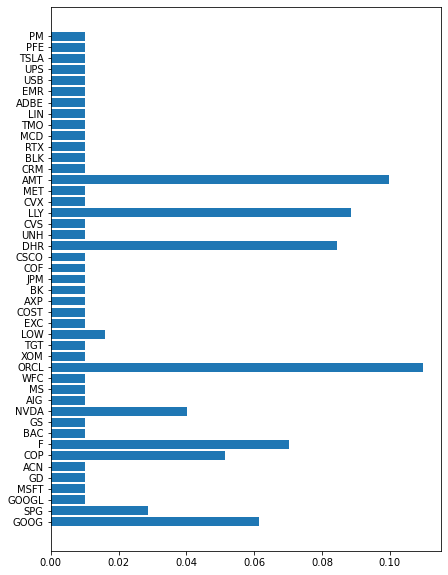

In [69]:
plt.figure(figsize=(7,10))
plt.barh(stocks.columns,w_opt.x)
plt.show()

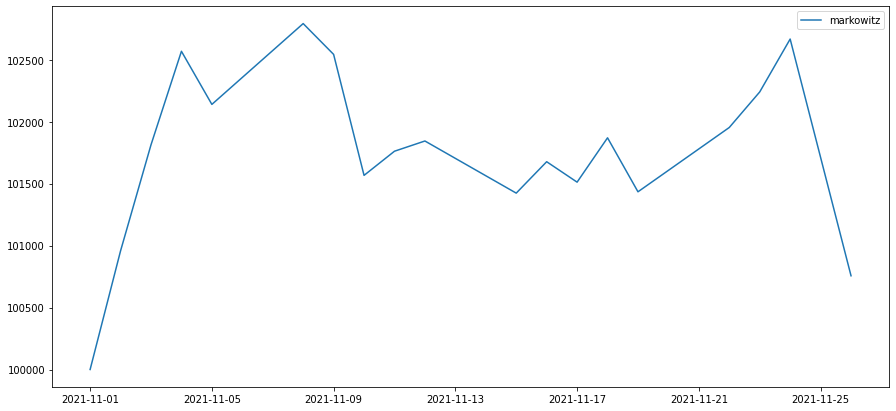

In [70]:
fig,ax = plt.subplots(figsize=(15,7))
validate(w_opt.x, ax, 'markowitz')
plt.legend()
plt.show()

In [71]:
plot_sectors(w_opt.x)

In [26]:
n = 100
def minimizeVolatility(w):
    w = np.array(w)
    v = np.sqrt(np.dot( w.T, np.dot(V,w)))
    return v
def getReturn(w):
    w = np.array(w)
    R = np.sum( r * w)
    return R

volatility_opt = []

for ret in np.linspace(0,1,n):
    #find best volatility
    constraints = ({'type':'eq', 'fun':check_sum_to_one},
                    {'type':'eq', 'fun': lambda w: getReturn(w) - ret})
    opt = minimize(minimizeVolatility,w0,method='SLSQP',bounds=bounds,constraints= constraints)

    #save opt volatility
    volatility_opt.append(opt['fun'])
    

C:\Users\rudol\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


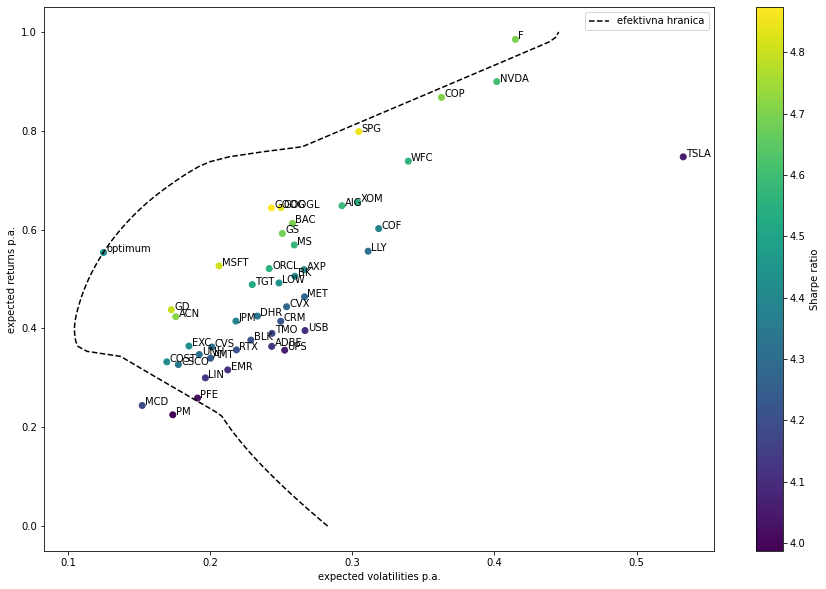

In [27]:
plt.figure(figsize=(15,10))

plt.plot(volatility_opt,np.linspace(0,1,n),'--',c='black',label='efektivna hranica')

plt.scatter(sigma,r,c=r/sigma)
for i,stock in enumerate(stocks.columns):
    plt.text(sigma[i]+0.002,r[i],stock)

plt.scatter(final_v,final_r,c=final_r/final_v)
plt.text(final_v+0.002,final_r,'optimum')

plt.ylabel('expected returns p.a.')
plt.xlabel('expected volatilities p.a.')
plt.legend()
plt.colorbar(label='Sharpe ratio')
plt.show()

### Pridane ohranicenia

In [28]:
def check_top17_to_80(w):
    topW = [1,2,8,13,16,19,26,27,30,31,34,36,37,38,40,43,44]
    output = 0
    for i in topW:
        output += w[i]
        
    return 0.8 - output
bounds = tuple(((0,1) for _ in range(n_stocks)))
constraints = ({'type':'eq','fun':check_sum_to_one}, {'type':'eq','fun':check_top17_to_80})

w0 = np.array([1/n_stocks*n_stocks])
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints= constraints)
w_opt

     fun: -4.488674874969814
     jac: array([ 0.0395934 ,  0.27156937,  0.27121347, -0.20525169, -0.38025522,
        0.79422218, -1.08519214, -1.08524549,  0.27137715,  0.28019679,
       -1.08508992,  0.42101008,  0.77423877,  0.27185673, -1.08566493,
       -0.00991225,  0.4845078 , -0.55923653,  0.0096879 ,  0.27154732,
        0.74647331,  0.04301518,  1.28133529,  0.11641753,  1.03268945,
       -0.31531799,  0.27119094,  0.27117264, -1.08539212,  1.33858323,
        1.80814254,  0.27116019,  0.16375321,  2.67732108,  1.65660191,
        0.65180439,  0.27137673,  1.75091231,  1.2102893 ,  2.5180316 ,
        1.62561417,  0.38997227, -0.07800806,  0.27129096,  1.09431517])
 message: 'Optimization terminated successfully'
    nfev: 984
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([2.62875302e-16, 9.28473444e-02, 1.33926298e-01, 3.48532634e-16,
       9.35608509e-16, 2.11441761e-16, 2.41959674e-02, 4.25588200e-02,
       1.06017980e-01, 1.04453979e-15, 1.684

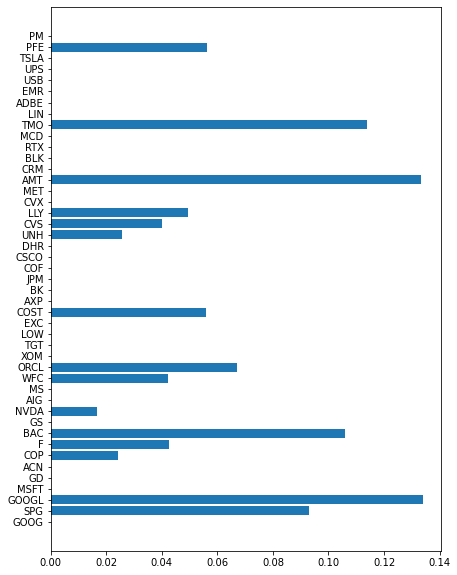

In [29]:
plt.figure(figsize=(7,10))
plt.barh(stocks.columns,w_opt.x)
plt.show()